# Homework for week 11 Classification on Stock Market data set

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
data.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
data['direction2']=data['Direction'].factorize()[0]
data.head(10)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,direction2
Year,,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,0
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,0
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,0
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,0
2001-01-01,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up,0
2001-01-01,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down,1
2001-01-01,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up,0
2001-01-01,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up,0


In [4]:
X_lag1 = data['Lag1'].values.reshape(-1,1)
X_lag2 = data['Lag2'].values.reshape(-1,1)

In [5]:
y_direction = data['direction2'].values.reshape(-1,1)

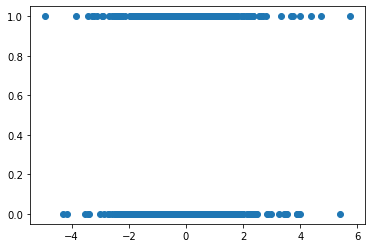

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_lag1,y_direction)

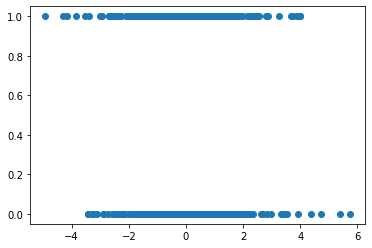

In [7]:
plt.scatter(X_lag2,y_direction)

## Now we split the data into training and test data according to time. Data before 2004 as training, data after 2004 as test.

In [8]:
X_train = data[:'2004'][['Lag1','Lag2']]
y_train = data[:'2004']['direction2']

X_test = data['2005':][['Lag1','Lag2']]
y_test = data['2005':]['direction2']

## Use the following methods (i) logistic regression (ii) LDA (iii) QDA (p.149 in textbook) and (iv) k-nearest neighbor and do (a) fit the model using training data (b) make prediction for the test data and (c) compare the truth and prediction in test data

### Logistic regression

In [9]:
import sklearn.linear_model as skl_lm


In [10]:
from sklearn.metrics import classification_report

In [11]:
clf = skl_lm.LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
pred_lg = clf.fit(X_train,y_train).predict(X_train)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

print(classification_report(y_train, pred_lg, target_names=['Down', 'Up']))

              precision    recall  f1-score   support

        Down       0.52      0.68      0.59       507
          Up       0.51      0.34      0.41       491

    accuracy                           0.52       998
   macro avg       0.52      0.51      0.50       998
weighted avg       0.52      0.52      0.50       998



### LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
lda = LinearDiscriminantAnalysis(solver='svd')
pred_lda = lda.fit(X_train, y_train).predict(X_train)

In [15]:
print(classification_report(y_train, pred_lda, target_names=['Down', 'Up']))

              precision    recall  f1-score   support

        Down       0.52      0.68      0.59       507
          Up       0.51      0.34      0.41       491

    accuracy                           0.52       998
   macro avg       0.52      0.51      0.50       998
weighted avg       0.52      0.52      0.50       998



### QDA

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics 

In [17]:
qda = QuadraticDiscriminantAnalysis()
y_qda = qda.fit(X_train, y_train).predict(X_test)
y_pred_QDA = qda.predict(X_test)

In [18]:
print('Accuracy - QDA:', metrics.accuracy_score(y_test, y_pred_QDA))  

Accuracy - QDA: 0.5992063492063492


### k-nearest neighbor (you may try 2 different k values to see which one performs better)

In [19]:
from sklearn import neighbors

In [20]:
knn = neighbors.KNeighborsClassifier(n_neighbors=331)
y_knn1 = knn.fit(X_train, y_train).predict(X_train)
#print(confusion_matrix(y_test, pred).T)
print(classification_report(y_train, y_knn1, digits=3))

              precision    recall  f1-score   support

           0      0.521     0.671     0.587       507
           1      0.517     0.365     0.428       491

    accuracy                          0.520       998
   macro avg      0.519     0.518     0.507       998
weighted avg      0.519     0.520     0.508       998



In [21]:
knn = neighbors.KNeighborsClassifier(n_neighbors=531)
y_knn1 = knn.fit(X_train, y_train).predict(X_train)
#print(confusion_matrix(y_test, pred).T)
print(classification_report(y_train, y_knn1, digits=3))

              precision    recall  f1-score   support

           0      0.512     0.736     0.604       507
           1      0.504     0.277     0.357       491

    accuracy                          0.510       998
   macro avg      0.508     0.506     0.481       998
weighted avg      0.508     0.510     0.483       998



### After comparing all different models and parameters, which method gives the best prediction power for the stock market data set?

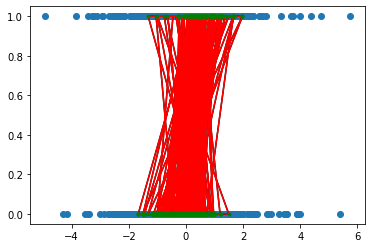

In [24]:
y_log = clf.predict(X_test)
y_lda = lda.predict(X_test)

plt.plot(X_test, y_log, 'k-')
plt.plot(X_test, y_lda, 'r-')
plt.plot(X_test, y_qda, 'g.')
plt.scatter(X_lag1,y_direction)

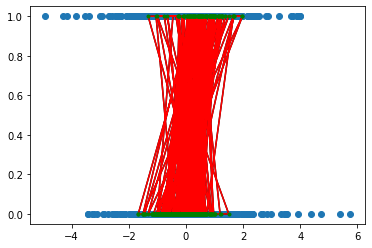

In [25]:
plt.plot(X_test, y_log, 'k-')
plt.plot(X_test, y_lda, 'r-')
plt.plot(X_test, y_qda, 'g.')
plt.scatter(X_lag2,y_direction)

# QDA has the best prediction power for the stock market data set. The QDA accuracy score was 60%, whereas LogR was 52%, LDA was 52% and KNN was 51%.